In [99]:
import pandas as pd
import json
import matplotlib.pyplot as plt

In [100]:
with open('./user_cold_state.json', encoding='utf-8') as f:
    data = json.loads(f.read())

In [101]:
score_data = pd.read_csv('./ratings.dat', names=['user_id', 'movie_id', 'rating', 'timestamp'],
                        sep="::", engine='python')

In [102]:
# popular/tail/niche items (top/bottom 20% popularity)
i_sorted = score_data.movie_id.value_counts().index
pop_items = i_sorted[:int(len(i_sorted)*0.2)].values
tail_items = i_sorted[int(len(i_sorted)*0.2):].values
niche_items = i_sorted[int(len(i_sorted)*0.8):].values

# cold_users
n_users = len(score_data.user_id.unique())
warm_users = score_data.user_id.value_counts().head(int(n_users*0.2)).index.values
cold_users = score_data.user_id.value_counts().tail(int(n_users*0.2)).index.values

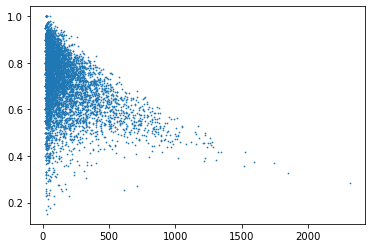

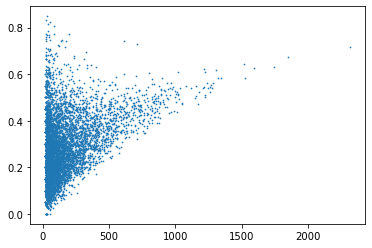

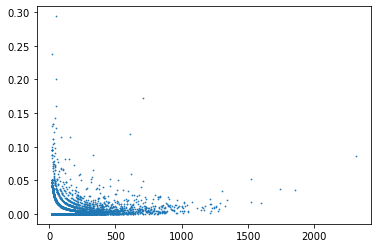

In [103]:
# ratio of pop and tail items for warm-/cold-start users
score_data['pop'] = score_data['movie_id'].apply(lambda x: 1 if x in pop_items else 0)
score_data['tail'] = score_data['movie_id'].apply(lambda x: 1 if x in tail_items else 0)
score_data['niche'] = score_data['movie_id'].apply(lambda x: 1 if x in niche_items else 0)

user_pop_cnt = score_data.groupby(['user_id'])['pop']
user_tail_cnt = score_data.groupby(['user_id'])['tail']
user_niche_cnt = score_data.groupby(['user_id'])['niche']

plt.scatter(score_data.groupby(['user_id']).movie_id.count(), user_pop_cnt.sum()/user_pop_cnt.count(), s=0.5) # 비율 
plt.show()
plt.scatter(score_data.groupby(['user_id']).movie_id.count(), user_tail_cnt.sum()/user_tail_cnt.count(), s=0.5) # 비율 
plt.show()
plt.scatter(score_data.groupby(['user_id']).movie_id.count(), user_niche_cnt.sum()/user_niche_cnt.count(), s=0.5) # 비율 
plt.show()